GGPlot Heatmap Reference: https://www.r-bloggers.com/2010/01/ggplot2-quick-heatmap-plotting/

GGPLOT contour: https://plotly.com/ggplot2/contour-plots/ <-- change ggplotly(p) to show(p)

ggplot Spatial Reference: https://eriqande.github.io/rep-res-web/lectures/making-maps-with-R.html

GGplot Themes: https://ggplot2.tidyverse.org/reference/theme.html

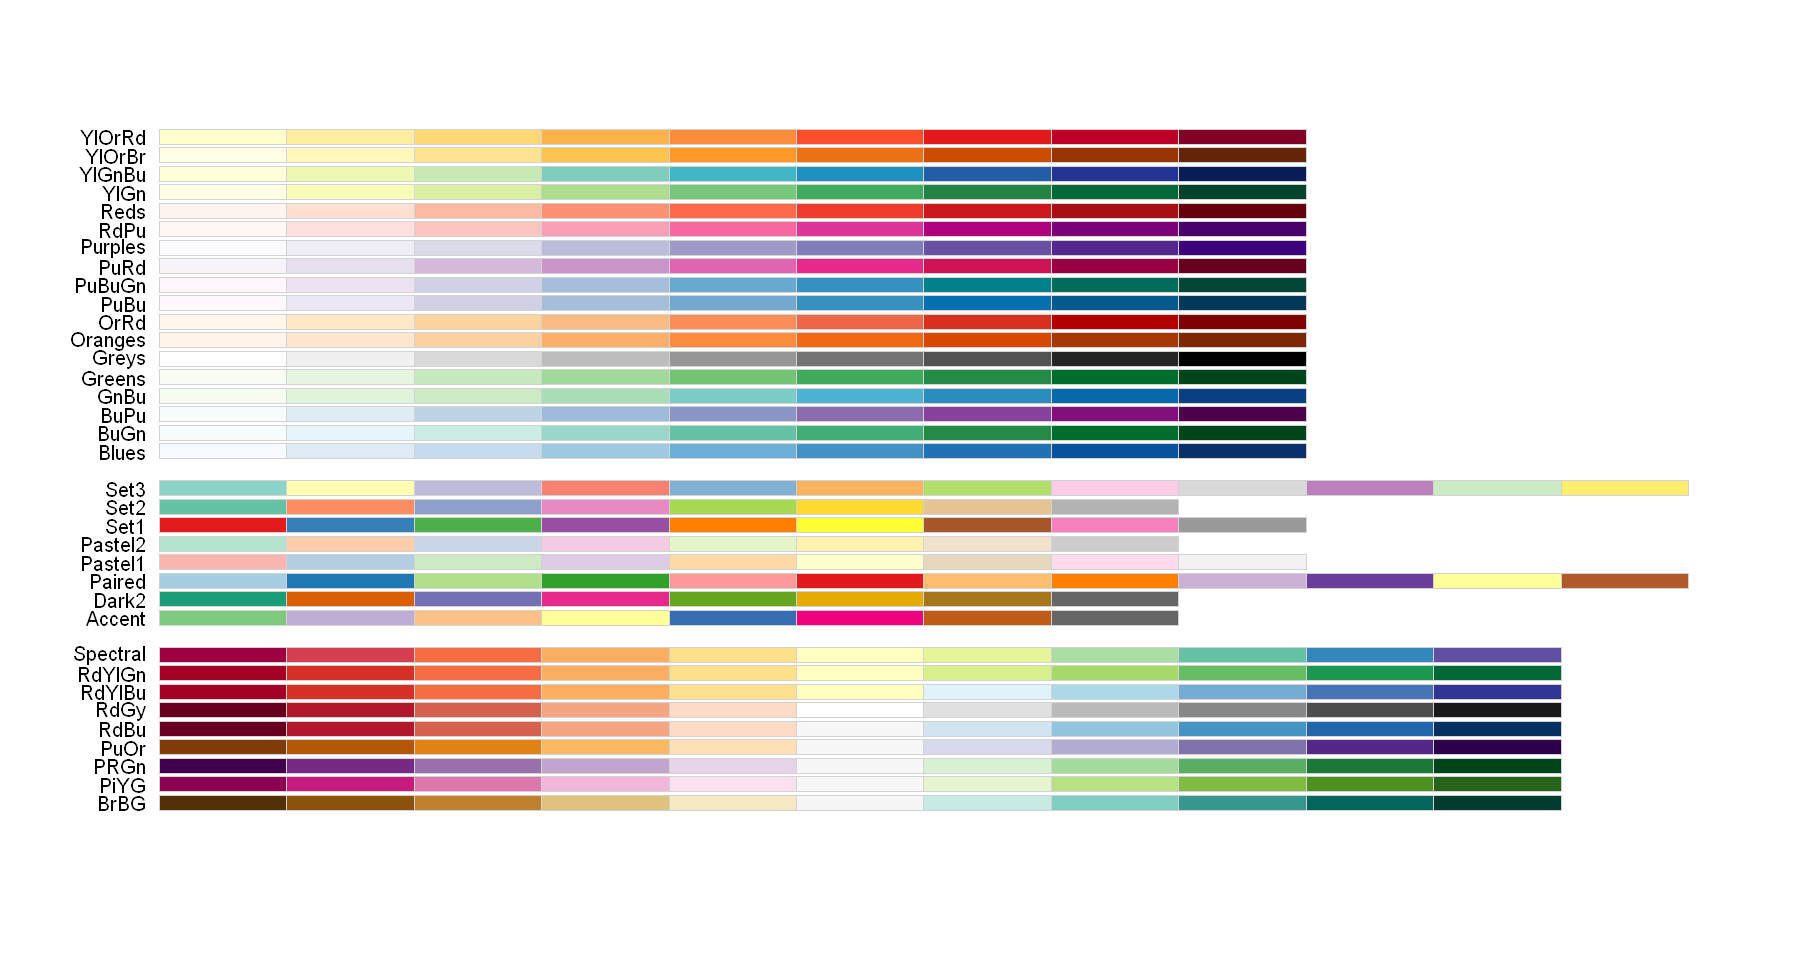

In [77]:
#//*** Load Libraries.
#//*** Install Pacman installer if not loaded
if (!require("pacman")) install.packages("pacman")
#install.packages("rjson")
#//*** Load libraries with pacman.
#//*** Automatically installs libraries as needed.
#p_load(ggplot2, ggthemes, dplyr, readr, scales, forcats, readxl, showtext, ggrepel, treemapify, RColorBrewer,viridis, plotly)

library(ggplot2)
library(ggthemes)
library(plyr)
library(dplyr)
library(plotly)
library(RColorBrewer)
library(tidyverse)
library(reshape2)
library("scales")
library("rgeos")
library("maptools")

library(ggsn)

#font_add("Tahoma","Tahoma.ttf")
#font_add("XKCD","./fonts/xkcd-Regular.otf")
#font_add("Roboto Condensed", "./fonts/RobotoCondensed-Regular.ttf")
#font_add("Decima Mono Pro","DecimaMonoPro.otf")
#showtext_auto()


# Make plots wider 
options(repr.plot.width=15, repr.plot.height=8)
display.brewer.all()

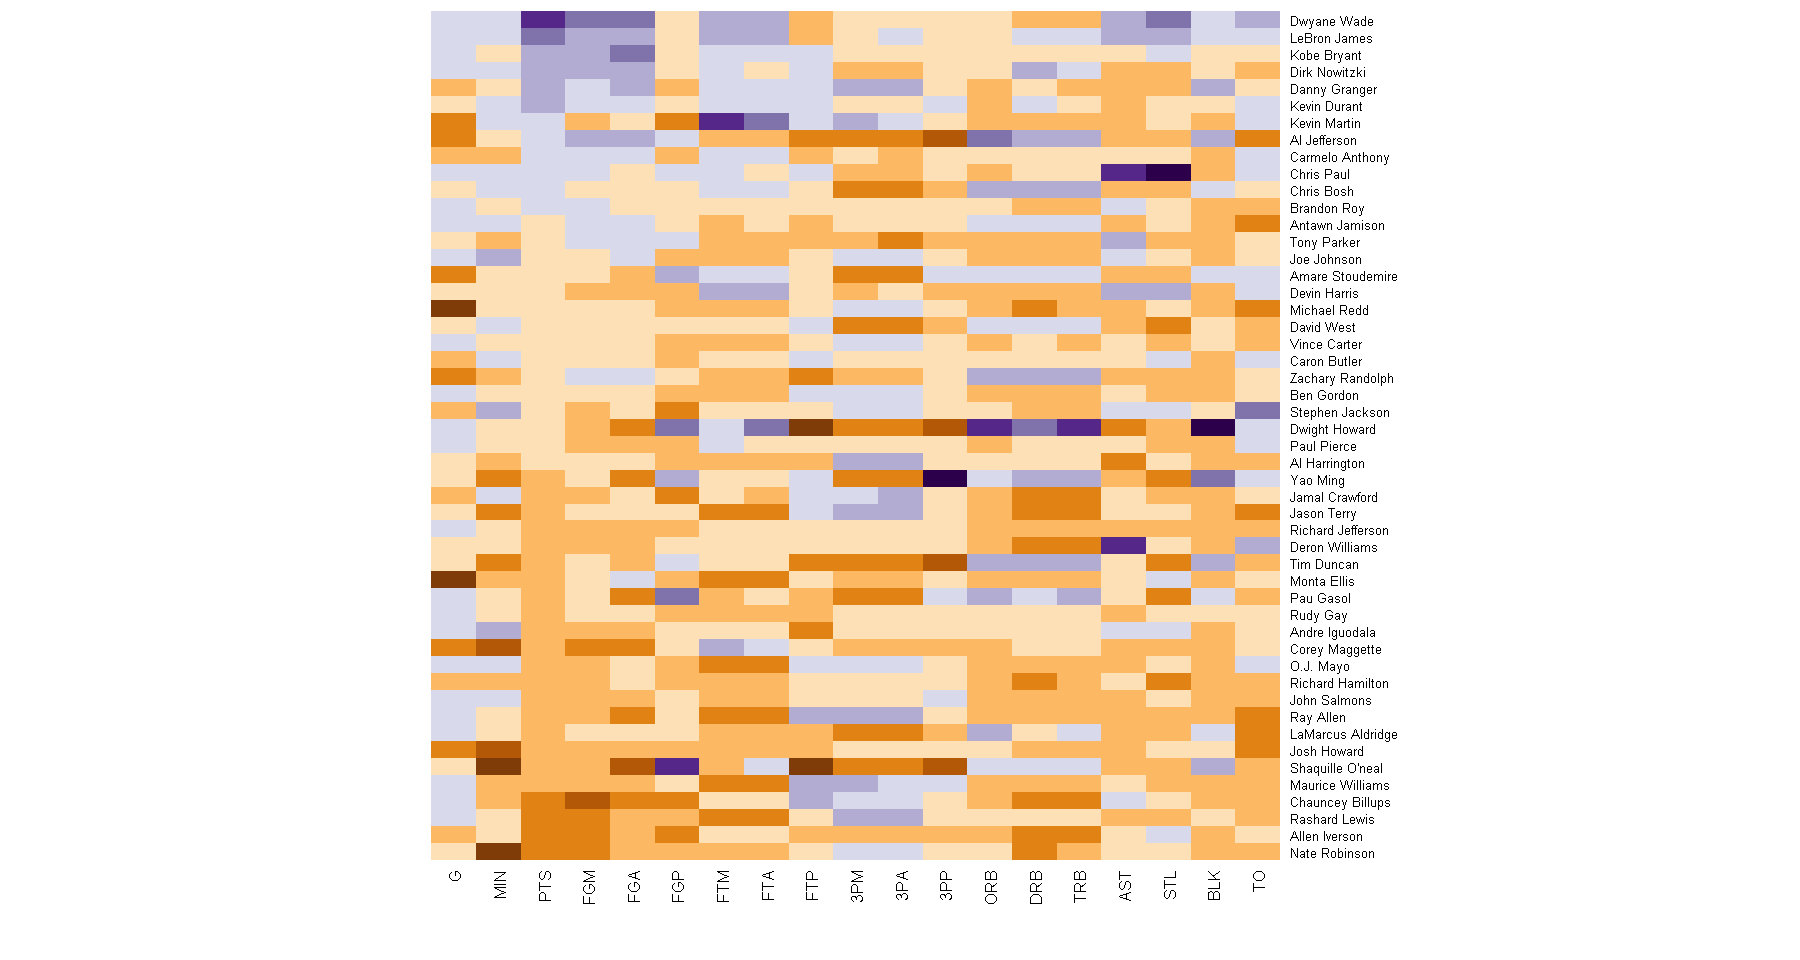

In [166]:
bb_df <- read_csv("./wk0910/z_wk09_10_ppg2008.csv",show_col_types = FALSE)

#//*** Reorder by Points
bb_df <- bb_df[order(bb_df$PTS), decreasing=FALSE]

#//*** Assign Matrix for Heatmaps
bb_matrix <- data.matrix(bb_df[,2:20])

#//*** Assign Row Names
row.names(bb_matrix)<- bb_df$Name

heatmap(bb_matrix, Rowv=NA,Colv=NA, col=brewer.pal(10,"PuOr"), scale='column')



In [4]:
library(tidyverse)

dt2 <- bb_df %>%
  rownames_to_column() %>%
  gather(colname, value, -rowname)
head(dt2)

rowname,colname,value
<chr>,<chr>,<chr>
1,Name,Nate Robinson
2,Name,Allen Iverson
3,Name,Rashard Lewis
4,Name,Chauncey Billups
5,Name,Maurice Williams
6,Name,Shaquille O'neal


Using Name as id variables



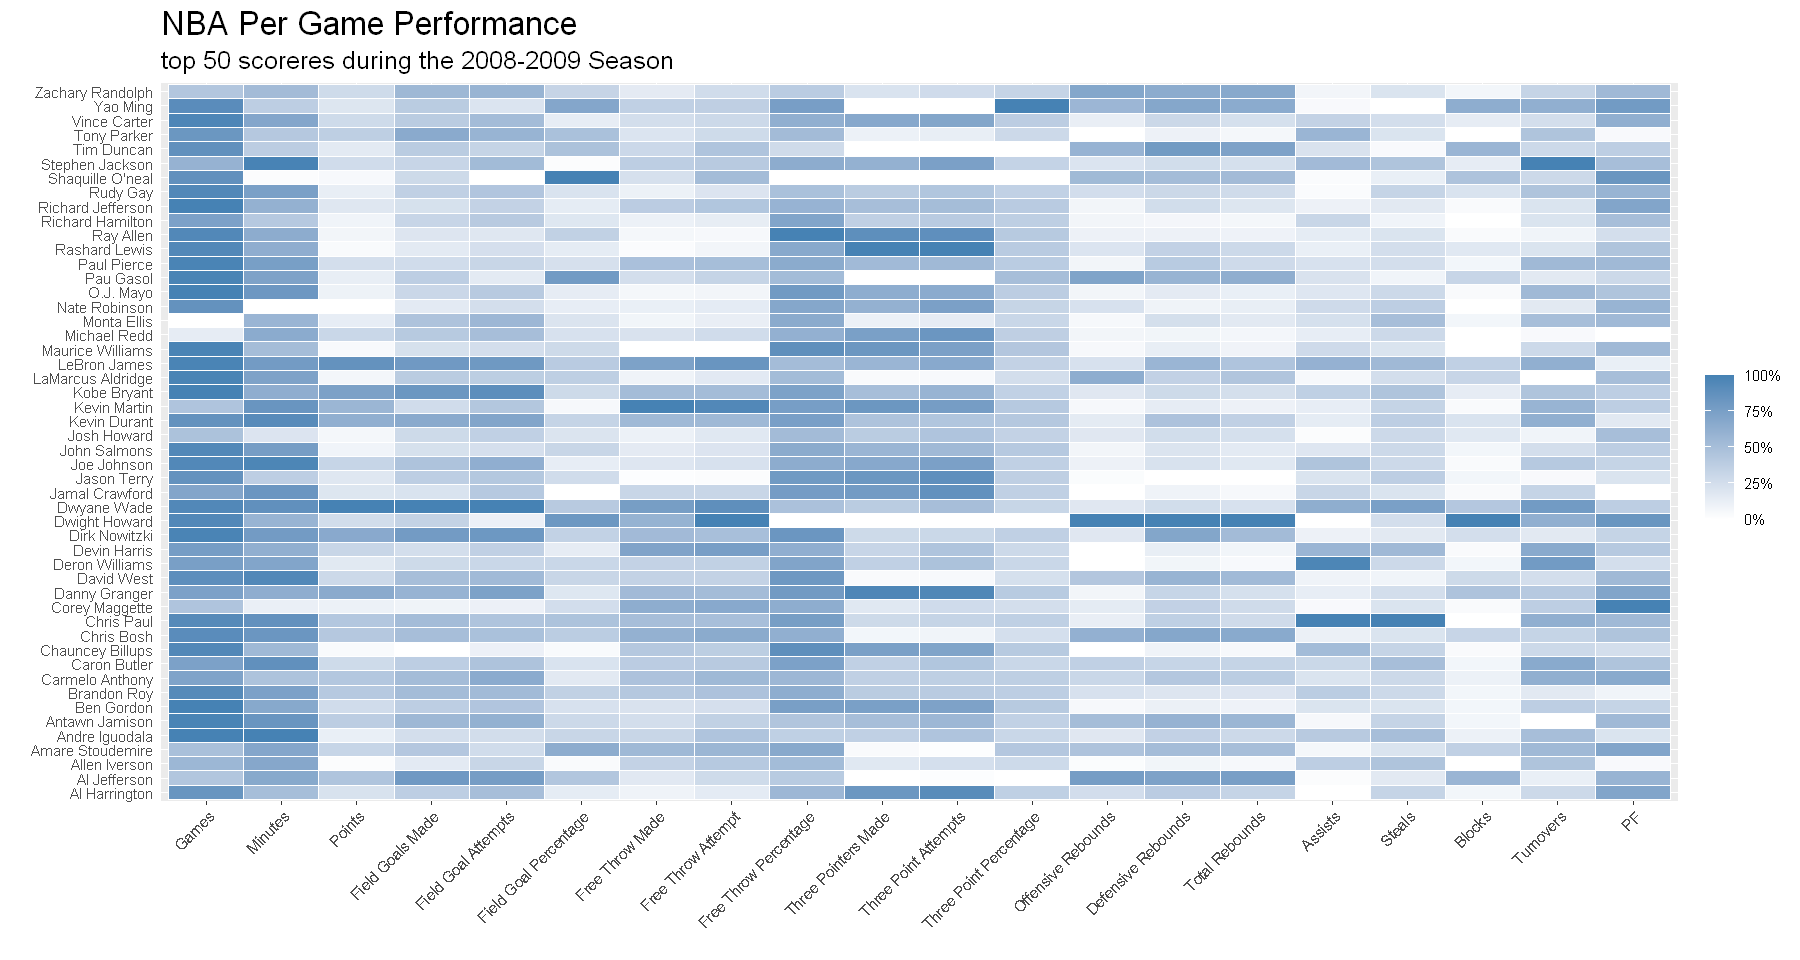

In [161]:

bb_df.m <- melt(bb_df)
bb_df.m <- ddply(bb_df.m, .(variable), transform, rescale = rescale(value))
#//*** 
#//** 

p <- ggplot(bb_df.m, aes(variable, Name)) + 
    geom_tile(aes(fill = rescale), colour = "white") + 
    scale_fill_gradient(low = "white", high = "steelblue", labels=c("0%","25%","50%","75%","100%")) + 
    theme(axis.text.x = element_text(angle=45, vjust=1, hjust=1))+
    theme(axis.ticks.y=element_blank())+
    theme(legend.title=element_blank())+
    theme(plot.title=element_text(size=20))+
    theme(plot.subtitle=element_text(size=15))+
    labs(title="NBA Per Game Performance",
         subtitle = "top 50 scoreres during the 2008-2009 Season",
    ,x="", y="", legend="X") +
    
    scale_x_discrete(labels=c(
        "G" = "Games",
        "MIN" = "Minutes",
        "PTS" = "Points",
        "FGM" = "Field Goals Made",
        "FGA" = "Field Goal Attempts",
        "FGP" = "Field Goal Percentage",
        "FTM" = "Free Throw Made",
        "FTA" = "Free Throw Attempt",
        "FTP" = "Free Throw Percentage",
        "3PM" = "Three Pointers Made",
        "3PA" = "Three Point Attempts",
        "3PP" = "Three Point Percentage",
        "ORB" = "Offensive Rebounds",
        "DRB" = "Defensive Rebounds",
        "TRB" = "Total Rebounds",
        "AST" = "Assists",
        "STL" = "Steals",
        "BLK" = "Blocks",
        "TO" = "Turnovers"
        ))



show(p)

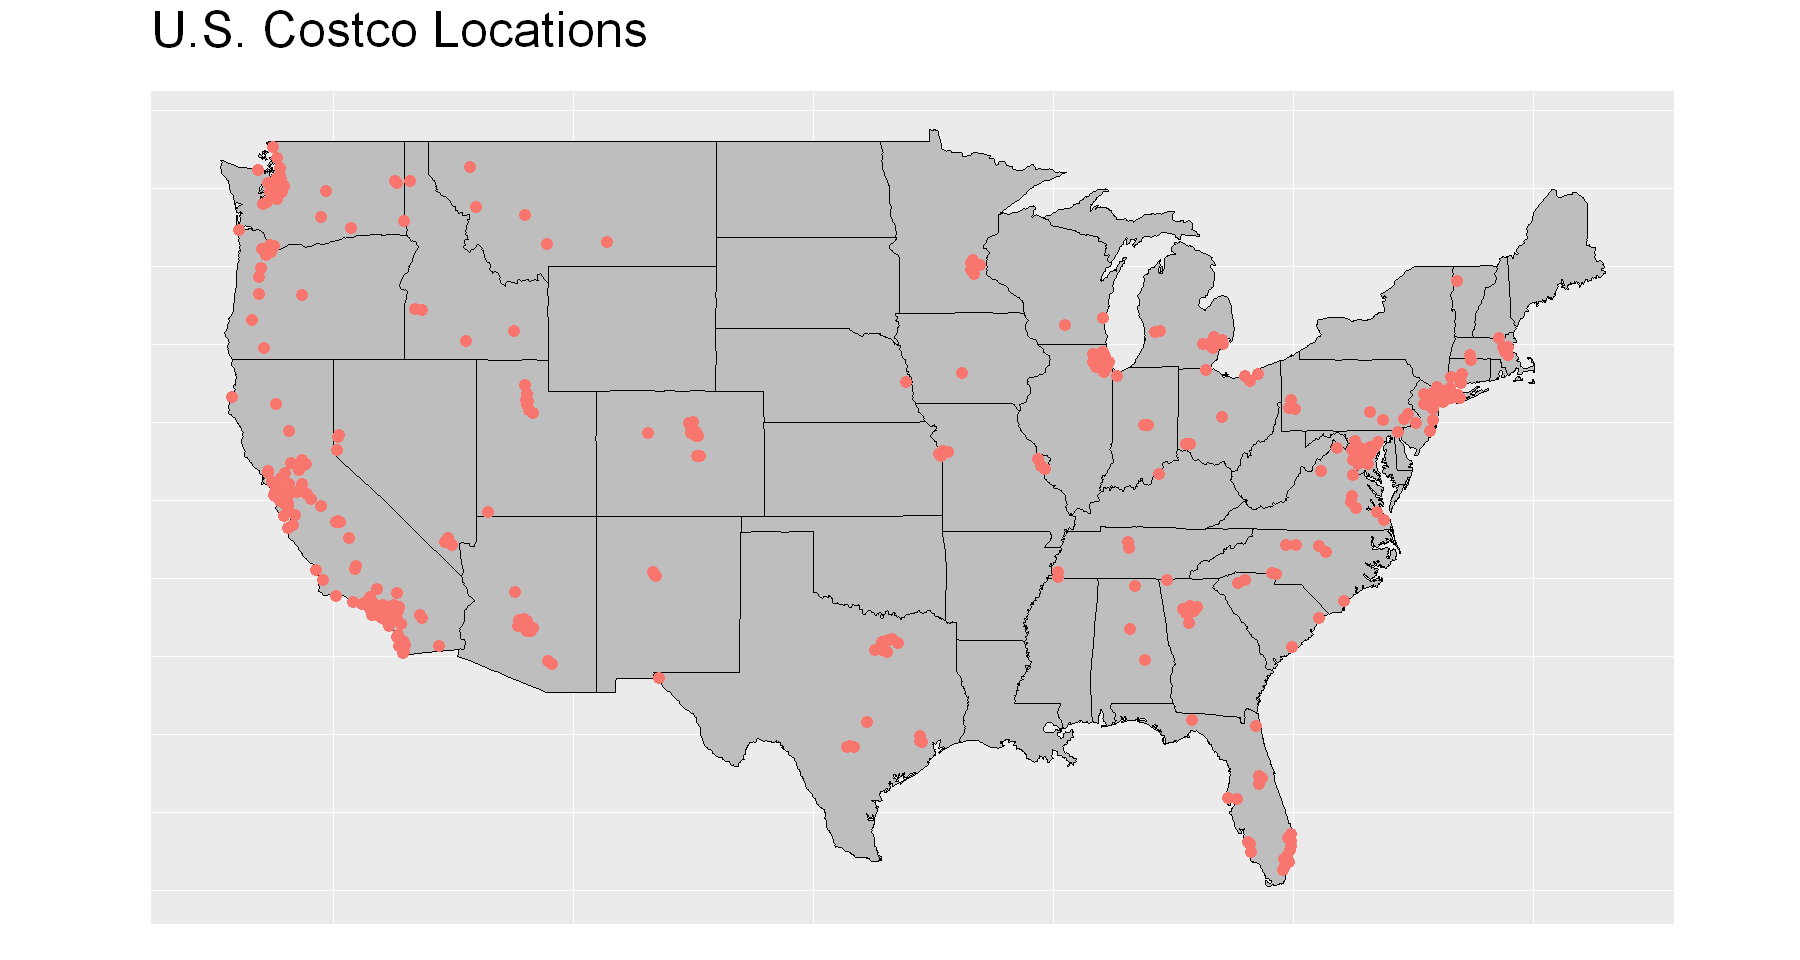

In [158]:
usa <- map_data("usa")
states <- map_data("state")
costco_df <- read_csv("./wk0910/z_wk09_10_costcos-geocoded.csv",show_col_types = FALSE)
costco_df = costco_df[costco_df[, "State"]!= "Alaska", ]
costco_df = costco_df[costco_df[, "State"]!= "Hawaii", ]

p <- ggplot() + 
  geom_polygon(data = states, aes(x = long, y = lat, group = group), color = "black", fill="gray") +
  geom_point(data=costco_df,aes(x=Longitude, y=Latitude, color='red'),size=3) +
  coord_fixed(1.3) +
  labs(
    title="U.S. Costco Locations",
    subtitle = "",
    x="", 
    y="" ) +
  theme(legend.title=element_blank())+
   theme(legend.position="none")+
  theme(plot.title=element_text(size=30))+
  theme(axis.text.x = element_blank())+
  theme(axis.ticks.x = element_blank())+
  theme(axis.text.y = element_blank())+
  theme(axis.ticks.y = element_blank())+

  guides(fill="none")  # do this to leave off the color legend 
  
p  

  #geom_point(costco_df, mapping = aes(x=Longitude, y=,  color='white'))+

Using Name as id variables



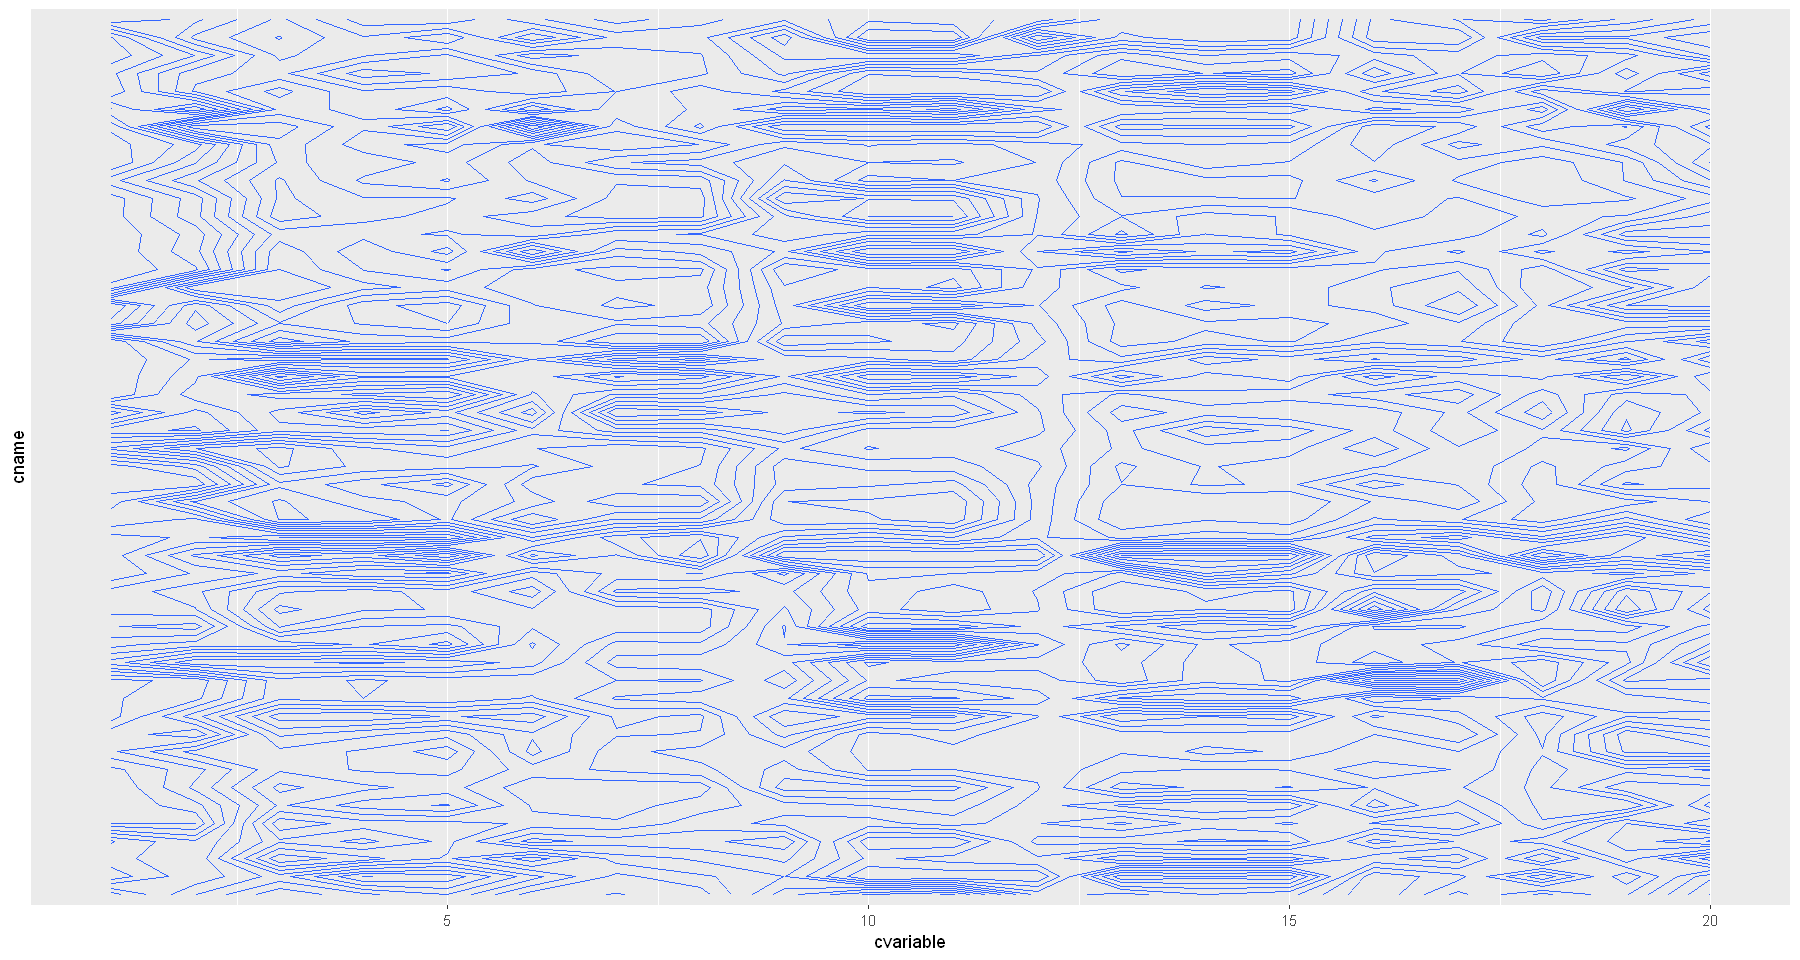

In [344]:
library(plotly)

library(reshape2)

#df <- melt(melt(bb_df))

bb_df.m <- melt(bb_df)
bb_df.m$cvariable <- as.integer(bb_df.m$variable)
bb_df.m$cname <- as.integer(as.factor(bb_df.m$Name))

bb_df.m <- ddply(bb_df.m, .(cvariable), transform, rescale = rescale(value))

tdf <- bb_df.m[1:50,]
tdf <- tdf[order(tdf$cname,decreasing=FALSE),]


name_list <- as.character(tdf$Name)



p <- ggplot(bb_df.m, aes(cvariable, cname, z=rescale )) +

  
  geom_contour() +
    
  #scale_y_discrete(labels=c(name_list))+
  
  #theme(axis.text.y = element_text("X") +
  scale_y_discrete(labels=c("0"="monta","1"="22"))+
  #scale_x_continuous(labels=name_list)+
    
  theme(axis.text.y = element_text(angle=45, vjust=1, hjust=1))+
  scale_fill_distiller(palette = "Spectral", direction = -1)
 

show(p)

Using Name as id variables



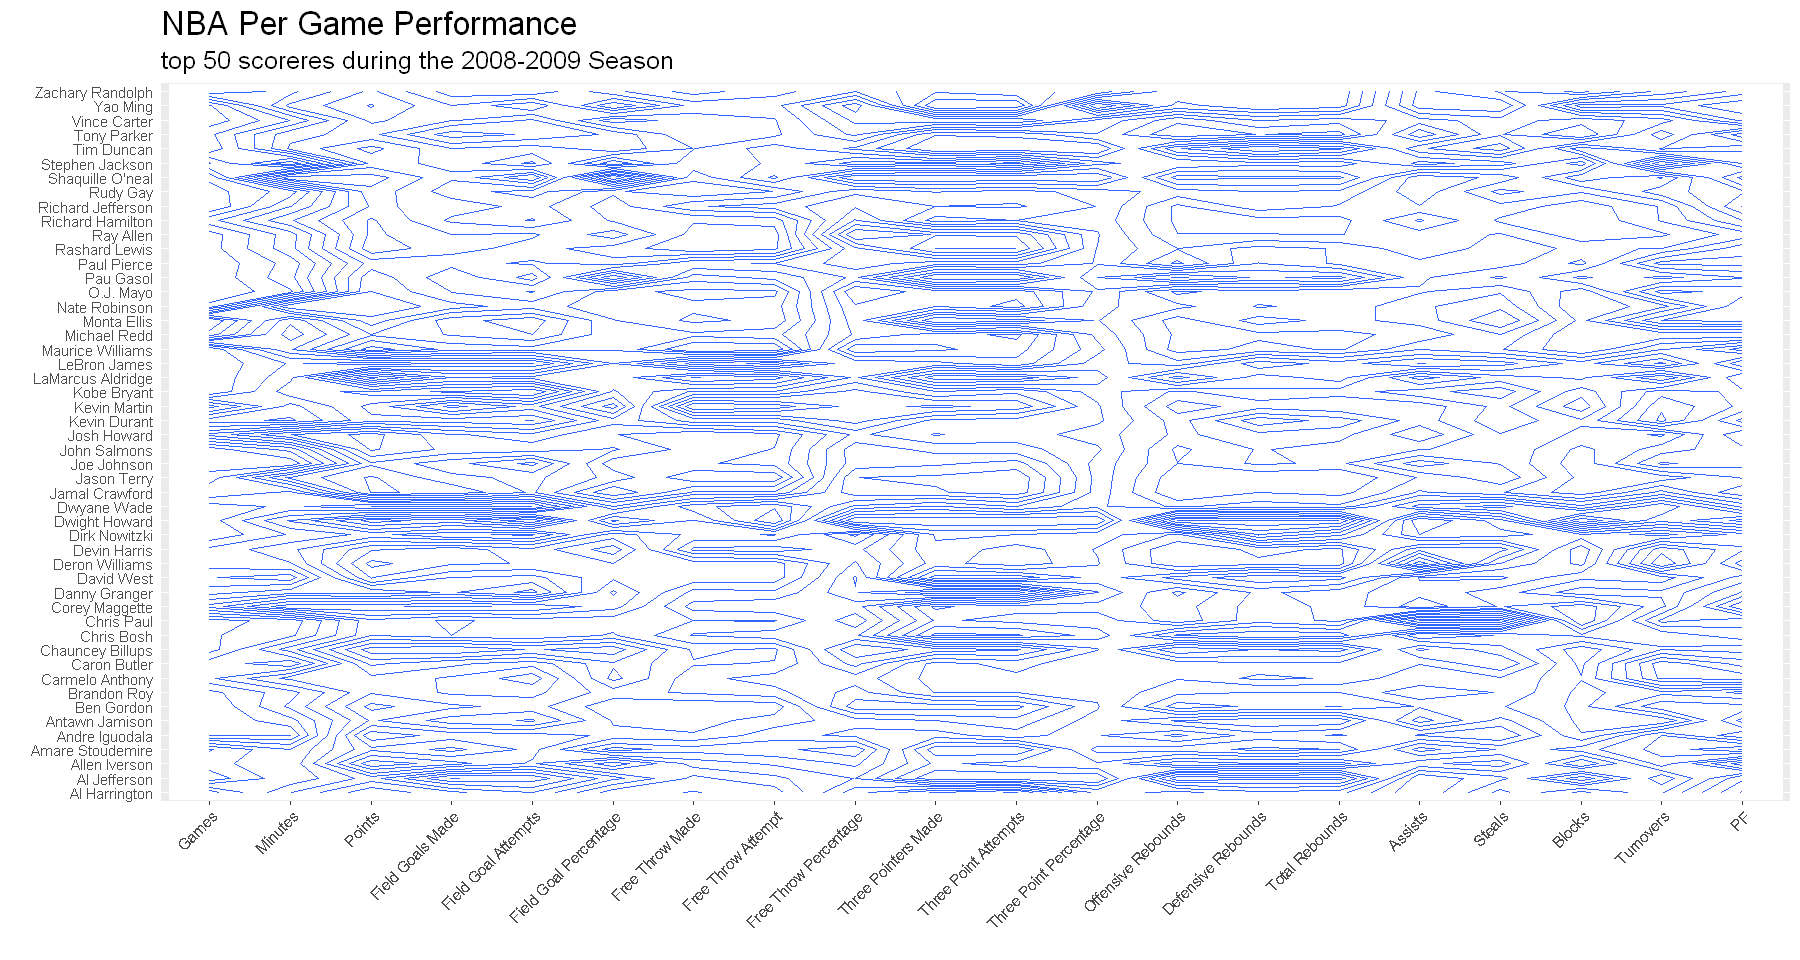

In [343]:

bb_df.m <- melt(bb_df)
bb_df.m <- ddply(bb_df.m, .(variable), transform, rescale = rescale(value))

#//*** cast the melted variable (column names) as integer categoricals
bb_df.m$cvariable <- as.integer(bb_df.m$variable)

#//*** cast the melted player names as integer categoricals
bb_df.m$cname <- as.integer(as.factor(bb_df.m$Name))

#//*** Plot the heatmap from above
p <- ggplot(bb_df.m, aes(variable, Name)) + 
    geom_tile(aes(fill = rescale), colour = "white") + 
    scale_fill_gradient(low = "white", high = "white", labels=c("0%","25%","50%","75%","100%")) + 
    theme(axis.text.x = element_text(angle=45, vjust=1, hjust=1))+
    theme(axis.ticks.y=element_blank())+
    theme(legend.title=element_blank())+
    theme(plot.title=element_text(size=20))+
    theme(plot.subtitle=element_text(size=15))+
    labs(title="NBA Per Game Performance",
         subtitle = "top 50 scoreres during the 2008-2009 Season",
    ,x="", y="", legend="X") +
    
    scale_x_discrete(labels=c(
        "G" = "Games",
        "MIN" = "Minutes",
        "PTS" = "Points",
        "FGM" = "Field Goals Made",
        "FGA" = "Field Goal Attempts",
        "FGP" = "Field Goal Percentage",
        "FTM" = "Free Throw Made",
        "FTA" = "Free Throw Attempt",
        "FTP" = "Free Throw Percentage",
        "3PM" = "Three Pointers Made",
        "3PA" = "Three Point Attempts",
        "3PP" = "Three Point Percentage",
        "ORB" = "Offensive Rebounds",
        "DRB" = "Defensive Rebounds",
        "TRB" = "Total Rebounds",
        "AST" = "Assists",
        "STL" = "Steals",
        "BLK" = "Blocks",
        "TO" = "Turnovers"
        ))+
        theme(legend.position="none")+
     
     #//*** Add Contour plot
     geom_contour(data=bb_df.m,aes(cvariable, cname, z=rescale )) 
show(p)

In [287]:
bb_df.m <- melt(bb_df)
bb_df.m$cvariable <- as.integer(bb_df.m$variable)
bb_df.m$cname <- as.integer(as.factor(bb_df.m$Name))

bb_df.m <- ddply(bb_df.m, .(cvariable), transform, rescale = rescale(value))

tdf <- bb_df.m[1:50,]
tdf <- tdf[order(tdf$cname,decreasing=FALSE),]


name_list <- tdf$Name

name_list


Using Name as id variables



[1] "Al Harrington"     "Al Jefferson"      "Allen Iverson"    
 [4] "Amare Stoudemire"  "Andre Iguodala"    "Antawn Jamison"   
 [7] "Ben Gordon"        "Brandon Roy"       "Carmelo Anthony"  
[10] "Caron Butler"      "Chauncey Billups"  "Chris Bosh"       
[13] "Chris Paul"        "Corey Maggette"    "Danny Granger"    
[16] "David West"        "Deron Williams"    "Devin Harris"     
[19] "Dirk Nowitzki"     "Dwight Howard"     "Dwyane Wade"      
[22] "Jamal Crawford"    "Jason Terry"       "Joe Johnson"      
[25] "John Salmons"      "Josh Howard"       "Kevin Durant"     
[28] "Kevin Martin"      "Kobe Bryant"       "LaMarcus Aldridge"
[31] "LeBron James"      "Maurice Williams"  "Michael Redd"     
[34] "Monta Ellis"       "Nate Robinson"     "O.J. Mayo"        
[37] "Pau Gasol"         "Paul Pierce"       "Rashard Lewis"    
[40] "Ray Allen"         "Richard Hamilton"  "Richard Jefferson"
[43] "Rudy Gay"          "Shaquille O'neal"  "Stephen Jackson"  
[46] "Tim Duncan"        "Tony Parker"       "Vince Carter"     
[49] "Yao Ming"          "Zachary Randolph"

In [345]:
bb_df

Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,⋯,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Nate Robinson,74,29.9,17.2,6.1,13.9,0.437,3.4,4.0,0.841,⋯,5.2,0.325,1.3,2.6,3.9,4.1,1.3,0.1,1.9,2.8
Allen Iverson,57,36.7,17.5,6.1,14.6,0.417,4.8,6.1,0.781,⋯,1.7,0.283,0.5,2.5,3.0,5.0,1.5,0.1,2.6,1.5
Rashard Lewis,79,36.2,17.7,6.1,13.8,0.439,2.8,3.4,0.836,⋯,7.0,0.397,1.2,4.6,5.7,2.6,1.0,0.6,2.0,2.5
Chauncey Billups,79,35.3,17.7,5.2,12.4,0.418,5.3,5.8,0.913,⋯,5.0,0.408,0.4,2.6,3.0,6.4,1.2,0.2,2.2,2.0
Maurice Williams,81,35.0,17.8,6.5,13.9,0.467,2.6,2.8,0.912,⋯,5.2,0.436,0.6,2.9,3.4,4.1,0.9,0.1,2.2,2.7
Shaquille O'neal,75,30.1,17.8,6.8,11.2,0.609,4.1,6.9,0.595,⋯,0.0,0.000,2.5,5.9,8.4,1.7,0.7,1.4,2.2,3.4
Josh Howard,52,31.9,18.0,6.8,15.1,0.451,3.3,4.2,0.782,⋯,3.2,0.345,1.1,3.9,5.1,1.6,1.1,0.6,1.7,2.6
LaMarcus Aldridge,81,37.1,18.1,7.4,15.3,0.484,3.2,4.1,0.781,⋯,0.3,0.250,2.9,4.6,7.5,1.9,1.0,1.0,1.5,2.6
Ray Allen,79,36.3,18.2,6.3,13.2,0.480,3.0,3.2,0.952,⋯,6.2,0.409,0.8,2.7,3.5,2.8,0.9,0.2,1.7,2.0
